# KPIs Analysis of COVID-19
14 March 2020

Cecilia García López de Munain

## Libraries

In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import pickle

## Parameters

In [2]:
sys.path.append('./')

In [3]:
PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME = 'covid_19_data_cum.pkl'

## Import Data

In [4]:
covid19_data = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME), "rb" ))

In [5]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density
DateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0,NaN,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0,9942334.0,120.265320
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0,5638676.0,7952.998418
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0,209469333.0,25.061716
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0,4137309.0,232.172222


In [6]:
covid19_data.columns

Index(['Day', 'Month', 'Year', 'NewConfCases', 'NewDeaths', 'CountryExp',
       'GeoId', 'NewConfCases_cum', 'NewDeaths_cum', 'Population',
       'Population Density'],
      dtype='object')

In [7]:
# Not studying conveyance Japan so dropping it 
covid19_data = covid19_data.loc[covid19_data['CountryExp'] != 'Cases on an international conveyance Japan',:]

## Explore behaviour

#### Functions

In [8]:
def compute_prop_increment(df):
    '''This function computes the proportion that the New Confirmed Cases mean among the Total Cases each day'''
    
    df.loc[:,'prop_increment'] = np.nan
    df.sort_values(['CountryExp','DateRep'], inplace=True)
    df.loc[:,'prop_increment'] = df.loc[:,'NewConfCases'] / df.shift(1).loc[:,'NewConfCases_cum'].where(
        cond=(df.loc[:,'CountryExp'] == df.shift(1).loc[:,'CountryExp']) & (df.shift(1).loc[:,'NewConfCases_cum'] > 0)
    )
    df.sort_index(inplace=True)
    return df

#### Prepare data

In [9]:
# Compute prop increment
covid19_data = compute_prop_increment(covid19_data)

In [10]:
covid19_data.tail()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,prop_increment
DateRep,,,,,,,,,,,,
2020-03-22,22,3,2020,12,0,Sri_Lanka,LK,78,0,NaN,NaN,0.181818
2020-03-22,22,3,2020,64,0,Iceland,IS,473,1,353574.0,3.526923,0.156479
2020-03-22,22,3,2020,19,0,Belarus,BY,76,0,9485386.0,46.728800,0.333333
2020-03-22,22,3,2020,0,0,Bermuda,BM,2,0,63968.0,1184.592572,0.000000
2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,2,0,14439018.0,37.324591,1.000000


### Plot Increment

In [11]:
# Filter worst countries
countries_worst = covid19_data.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(20).index
covid19_data.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(20)

CountryExp
China                       81499
Italy                       53578
United_States_of_America    26747
Spain                       24926
Germany                     21463
Iran                        20610
France                      14459
South_Korea                  8897
Switzerland                  6077
United_Kingdom               5018
Netherlands                  3631
Austria                      3024
Belgium                      2815
Norway                       1926
Sweden                       1746
Denmark                      1326
Portugal                     1280
Malaysia                     1183
Brazil                       1128
Australia                    1098
Name: NewConfCases, dtype: int64

c:\users\c.lopez.de.munain\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


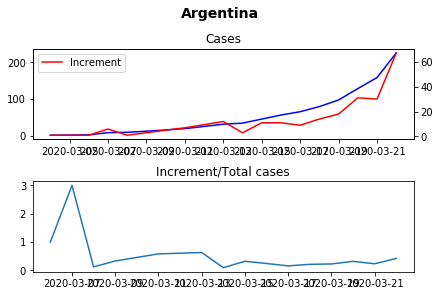

In [12]:
for i, country in enumerate(['Argentina']):
    '''This function plots 
    1. Total Cases and daily increment
    2. Proportion of increment among total cases
    '''
    
    fig, axs = plt.subplots(2, 1, constrained_layout=True)
    axextra = axs[0].twinx()
    data_to_plot = covid19_data[covid19_data['CountryExp']==country]

    tot_cases = axs[0].plot(data_to_plot['NewConfCases_cum'], color='blue', label='Total Cases')
    axs[0].set_title('Cases')

    increment = axextra.plot(data_to_plot['NewConfCases'], color='red', label='Increment')
    plt.legend()

    prop_increment = axs[1].plot(data_to_plot['prop_increment'])
    axs[1].set_title('Increment/Total cases')

    fig.suptitle(country, fontsize=14, fontweight='bold')
    plt.show()
    
    if i == 5:
        break

In [12]:
# Flags for max prop increment and max increment

covid19_data.loc[:,'ismax_prop_increment'] = (covid19_data.groupby('CountryExp')['prop_increment'].transform(max) == covid19_data.loc[:,'prop_increment']) & (covid19_data.loc[:,'NewConfCases_cum'] > 1)
covid19_data.loc[:,'ismax_NewConfCases'] = covid19_data.groupby('CountryExp')['NewConfCases'].transform(max) == covid19_data.loc[:,'NewConfCases'] 
covid19_data.tail()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,prop_increment,ismax_prop_increment,ismax_NewConfCases
DateRep,,,,,,,,,,,,,,
2020-03-22,22,3,2020,12,0,Sri_Lanka,LK,78,0,NaN,NaN,0.181818,False,False
2020-03-22,22,3,2020,64,0,Iceland,IS,473,1,353574.0,3.526923,0.156479,False,False
2020-03-22,22,3,2020,19,0,Belarus,BY,76,0,9485386.0,46.728800,0.333333,False,True
2020-03-22,22,3,2020,0,0,Bermuda,BM,2,0,63968.0,1184.592572,0.000000,True,False
2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,2,0,14439018.0,37.324591,1.000000,True,True


In [13]:
def calc_days_between_peaks(df):
    '''This function computes de difference in days between the flags of max prop increment and max increment'''
    
    df.loc[:,'days_between_peaks'] = np.nan
    for country in df['CountryExp'].unique():
        data = df[df['CountryExp']==country]
        min_increment = data[data['ismax_NewConfCases']].index.min()
        min_prop = data[data['ismax_prop_increment']].index.min()
        days_between_peaks = (min_increment - min_prop).days
        df.loc[df['CountryExp']==country,'days_between_peaks'] = days_between_peaks
        df.sort_index(inplace=True)

In [14]:
# Run computation
calc_days_between_peaks(covid19_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8097BEC50>]],
      dtype=object)

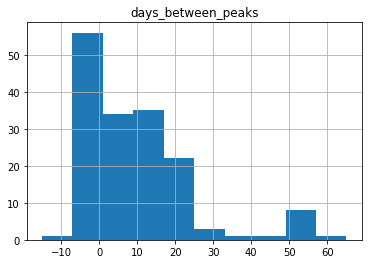

In [15]:
covid19_data.loc[:,['CountryExp','days_between_peaks']].reset_index().drop(columns='DateRep').drop_duplicates().hist()

Plot every country - doesn't mean anything because most of them haven't reached their peaks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B80B909400>]],
      dtype=object)

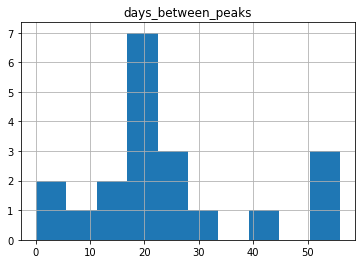

In [16]:
covid19_data.loc[covid19_data['CountryExp'].isin(countries_worst),['CountryExp','days_between_peaks']].reset_index().drop(columns='DateRep').drop_duplicates().hist()

Plot only 15 worst countries

In [17]:
median = covid19_data.loc[covid19_data['CountryExp'].isin(countries_worst),['CountryExp','days_between_peaks']].reset_index().drop(columns='DateRep').drop_duplicates().median()

print('Countries with most confirmed cases have a median of ',median.values[0],' days between peak in Confirmed Cases and the maximum proportion that Confirmed Cases mean among the Total Cases')

Countries with most confirmed cases have a median of  21.5  days between peak in Confirmed Cases and the maximum proportion that Confirmed Cases mean among the Total Cases


### Population analysis

In [18]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,prop_increment,ismax_prop_increment,ismax_NewConfCases,days_between_peaks
DateRep,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Afghanistan,AF,0,0,37172386.0,56.937760,NaN,False,False,8.0
2019-12-31,31,12,2019,0,0,Greece,EL,0,0,10727668.0,83.224732,NaN,False,False,10.0
2019-12-31,31,12,2019,0,0,Germany,DE,0,0,82927922.0,237.370970,NaN,False,False,51.0
2019-12-31,31,12,2019,0,0,Georgia,GE,0,0,3731000.0,65.275202,NaN,False,False,5.0
2019-12-31,31,12,2019,0,0,France,FR,0,0,66987244.0,122.338396,NaN,False,False,21.0


In [19]:
countriesworst_nonchina = [c for c in countries_worst if c != 'China']

In [20]:
datacorr = covid19_data.loc[covid19_data.loc[:,'CountryExp'].isin(countriesworst_nonchina),['CountryExp','days_between_peaks','Population']].set_index('CountryExp').dropna().drop_duplicates()

dbp = datacorr.loc[:,'days_between_peaks']
pop = datacorr.loc[:,'Population']

print('Correlation between population and days between peaks', dbp.corr(pop))

Correlation between population and days between peaks 0.09021775737233732


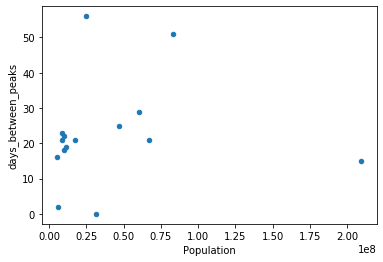

In [21]:
ax1 = datacorr.loc[:,['Population','days_between_peaks']].plot.scatter(
                      x='Population',
                      y='days_between_peaks')

Population vs. Days between peaks. Correlation is contraintuitive. Discarding this approach

### When does the first peak of new cases happen?

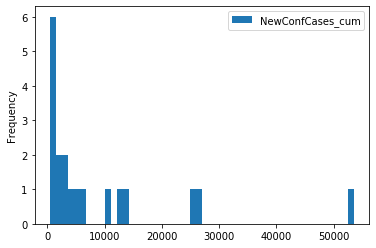

In [22]:
covid19_data.loc[(covid19_data.loc[:,'ismax_NewConfCases'])&(covid19_data.loc[:,'CountryExp'].isin(countriesworst_nonchina)),['CountryExp','NewConfCases_cum']].plot(kind='hist', bins=50)

People infected when peak at new confirmed cases happens.

In [23]:
median = covid19_data.loc[(covid19_data.loc[:,'ismax_NewConfCases'])&(covid19_data.loc[:,'CountryExp'].isin(countriesworst_nonchina)),['CountryExp','NewConfCases_cum']].median()

print('Outbreak happens around ', median.values[0], 'already infected people.')

Outbreak happens around  2931.0 already infected people.


That same number but considering population

In [24]:
data = covid19_data.loc[(covid19_data.loc[:,'ismax_NewConfCases']),:]
covid19_data.loc[:,'maxnewcases/population'] = data.loc[:,'NewConfCases_cum'] / data.loc[:,'Population']

ValueError: cannot reindex from a duplicate axis

In [25]:
countries_worst

Index(['China', 'Italy', 'United_States_of_America', 'Spain', 'Germany',
       'Iran', 'France', 'South_Korea', 'Switzerland', 'United_Kingdom',
       'Netherlands', 'Austria', 'Belgium', 'Norway', 'Sweden', 'Denmark',
       'Portugal', 'Malaysia', 'Brazil', 'Australia'],
      dtype='object', name='CountryExp')

In [28]:
covid19_data_worst.loc[:,'CountryExp'].unique()

IndexingError: Too many indexers

In [27]:
# data = covid19_data.loc[(covid19_data.loc[:,'ismax_NewConfCases'])&(covid19_data.loc[:,'CountryExp'].isin(countriesworst_nonchina)),:]
# covid19_data.loc[:,'maxnewcases/population'] = data.loc[:,'NewConfCases_cum'] / data.loc[:,'Population']
# covid19_data.loc[:,'maxnewcases/population'].plot(kind='hist', bins=20)


covid19_data_worst = covid19_data.loc[covid19_data.loc[:,'ismax_NewConfCases'],'NewConfCases_cum'] / covid19_data.loc[covid19_data.loc[:,'ismax_NewConfCases'],'Population']
# covid19_data_worst = covid19_data.loc[covid19_data.loc[:,'CountryExp'].isin(countries_worst),:]
# covid19_data_worst.loc[:,'maxnewcases/population'].plot(kind='hist', bins=200)

% of population infected when peak at new confirmed cases happens.

In [30]:
covid19_data_worst.head()

DateRep
2020-01-25    3.560256e-08
2020-02-13    4.298392e-05
2020-02-16             NaN
2020-02-29             NaN
2020-03-06    1.325567e-06
dtype: float64

In [29]:
print('Outbreak happens when', covid19_data_worst.loc[:,'maxnewcases/population'].median()*100, '% of population is infected.')

IndexingError: Too many indexers

In [66]:
data.loc[:,'maxnewcases/population'].describe()

count    15.000000
mean      0.000075
std       0.000058
min       0.000006
25%       0.000048
50%       0.000061
75%       0.000093
max       0.000250
Name: maxnewcases/population, dtype: float64

In [73]:
datacorr = data.loc[data.loc[:,'CountryExp'].isin(countriesworst_nonchina),['CountryExp','Population Density','maxnewcases/population']].set_index('CountryExp').dropna().drop_duplicates()

dbp = datacorr.loc[:,'maxnewcases/population']
popden = datacorr.loc[:,'Population Density']

print('Correlation between maxnewcases/population and days Population Density', dbp.corr(popden))

Correlation between maxnewcases/population and days Population Density 0.05692405041381739


(6e-06, 0.00025)

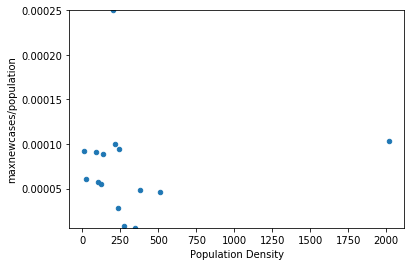

In [74]:
ax1 = data.loc[:,['Population Density','maxnewcases/population']].plot.scatter(
                      x='Population Density',
                      y='maxnewcases/population')
plt.ylim(0.000006, 0.000250)